In [ ]:
#import data
#see columns
#take out genre

Netflix wants to identify similar movies based on movie characteristics.

In [6]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn import datasets, metrics

In [34]:
df = pd.read_csv('2016.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
Country                          157 non-null object
Region                           157 non-null object
Happiness Rank                   157 non-null int64
Happiness Score                  157 non-null float64
Lower Confidence Interval        157 non-null float64
Upper Confidence Interval        157 non-null float64
Economy (GDP per Capita)         157 non-null float64
Family                           157 non-null float64
Health (Life Expectancy)         157 non-null float64
Freedom                          157 non-null float64
Trust (Government Corruption)    157 non-null float64
Generosity                       157 non-null float64
Dystopia Residual                157 non-null float64
dtypes: float64(10), int64(1), object(2)
memory usage: 16.0+ KB


In [36]:
df['Country'].nunique()

157

In [37]:
#make dummies
df = pd.concat([df, pd.get_dummies(df['Country'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['Region'])], axis=1)

#delete these columns so that the dataframe is numerical
del df['Country']
del df['Region']

df.head()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,...,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
0,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,...,0,0,0,0,0,0,0,0,0,1
1,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,...,0,0,0,0,0,0,0,0,0,1
2,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,...,0,0,0,0,0,0,0,0,0,1
3,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,...,0,0,0,0,0,0,0,0,0,1
4,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,...,0,0,0,0,0,0,0,0,0,1


In [38]:
df_columnnames= list(df.columns) #attaching column names in list form to a variable

from sklearn.preprocessing import StandardScaler

# Separating out the features
X = df[df_columnnames]

# Separating out the target
#y = df['neighbourhood_group']

# Standardizing the features
X_std = StandardScaler().fit_transform(X)

In [39]:
df.shape

(157, 178)

In [41]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000) 
# since we want to visualize tsne in 2 dimensions, n_components = 2
tsne_results = tsne.fit_transform(X_std)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 157 samples in 0.001s...
[t-SNE] Computed neighbors for 157 samples in 0.018s...
[t-SNE] Computed conditional probabilities for sample 157 / 157
[t-SNE] Mean sigma: 2.425696
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.604660
[t-SNE] KL divergence after 900 iterations: 0.219773


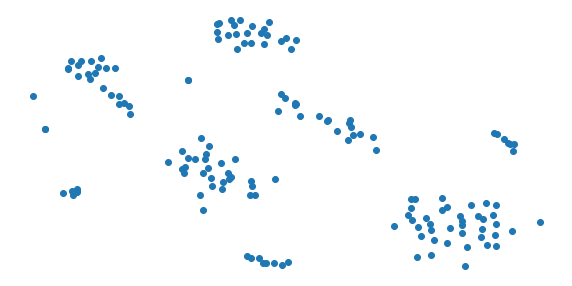

In [42]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [43]:
import umap
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X_std)

//anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


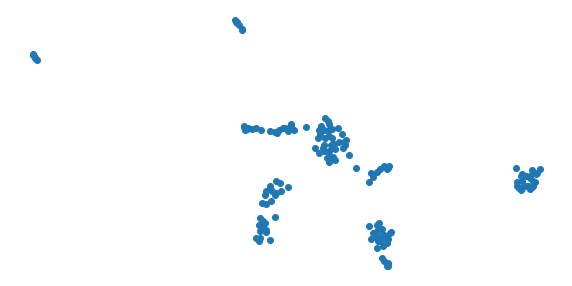

In [45]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [46]:
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn import datasets, metrics

In [47]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123)

# Fit model
clusters_gmm = gmm_cluster.fit_predict(X_std)

In [67]:
#tsne_results = tsne.fit_transform(X_std)
#pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], str(clusters_gmm[i]),
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [66]:
print("The silhouette score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters_gmm, metric='euclidean')))

The silhouette score of the GMM solution: 0.028067468588752153


In [ ]:
umap_results

In [50]:
from sklearn.cluster import DBSCAN

In [52]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=0.5, min_samples=5)

# Fit model
clusters_dbscan = dbscan_cluster.fit_predict(X_std)

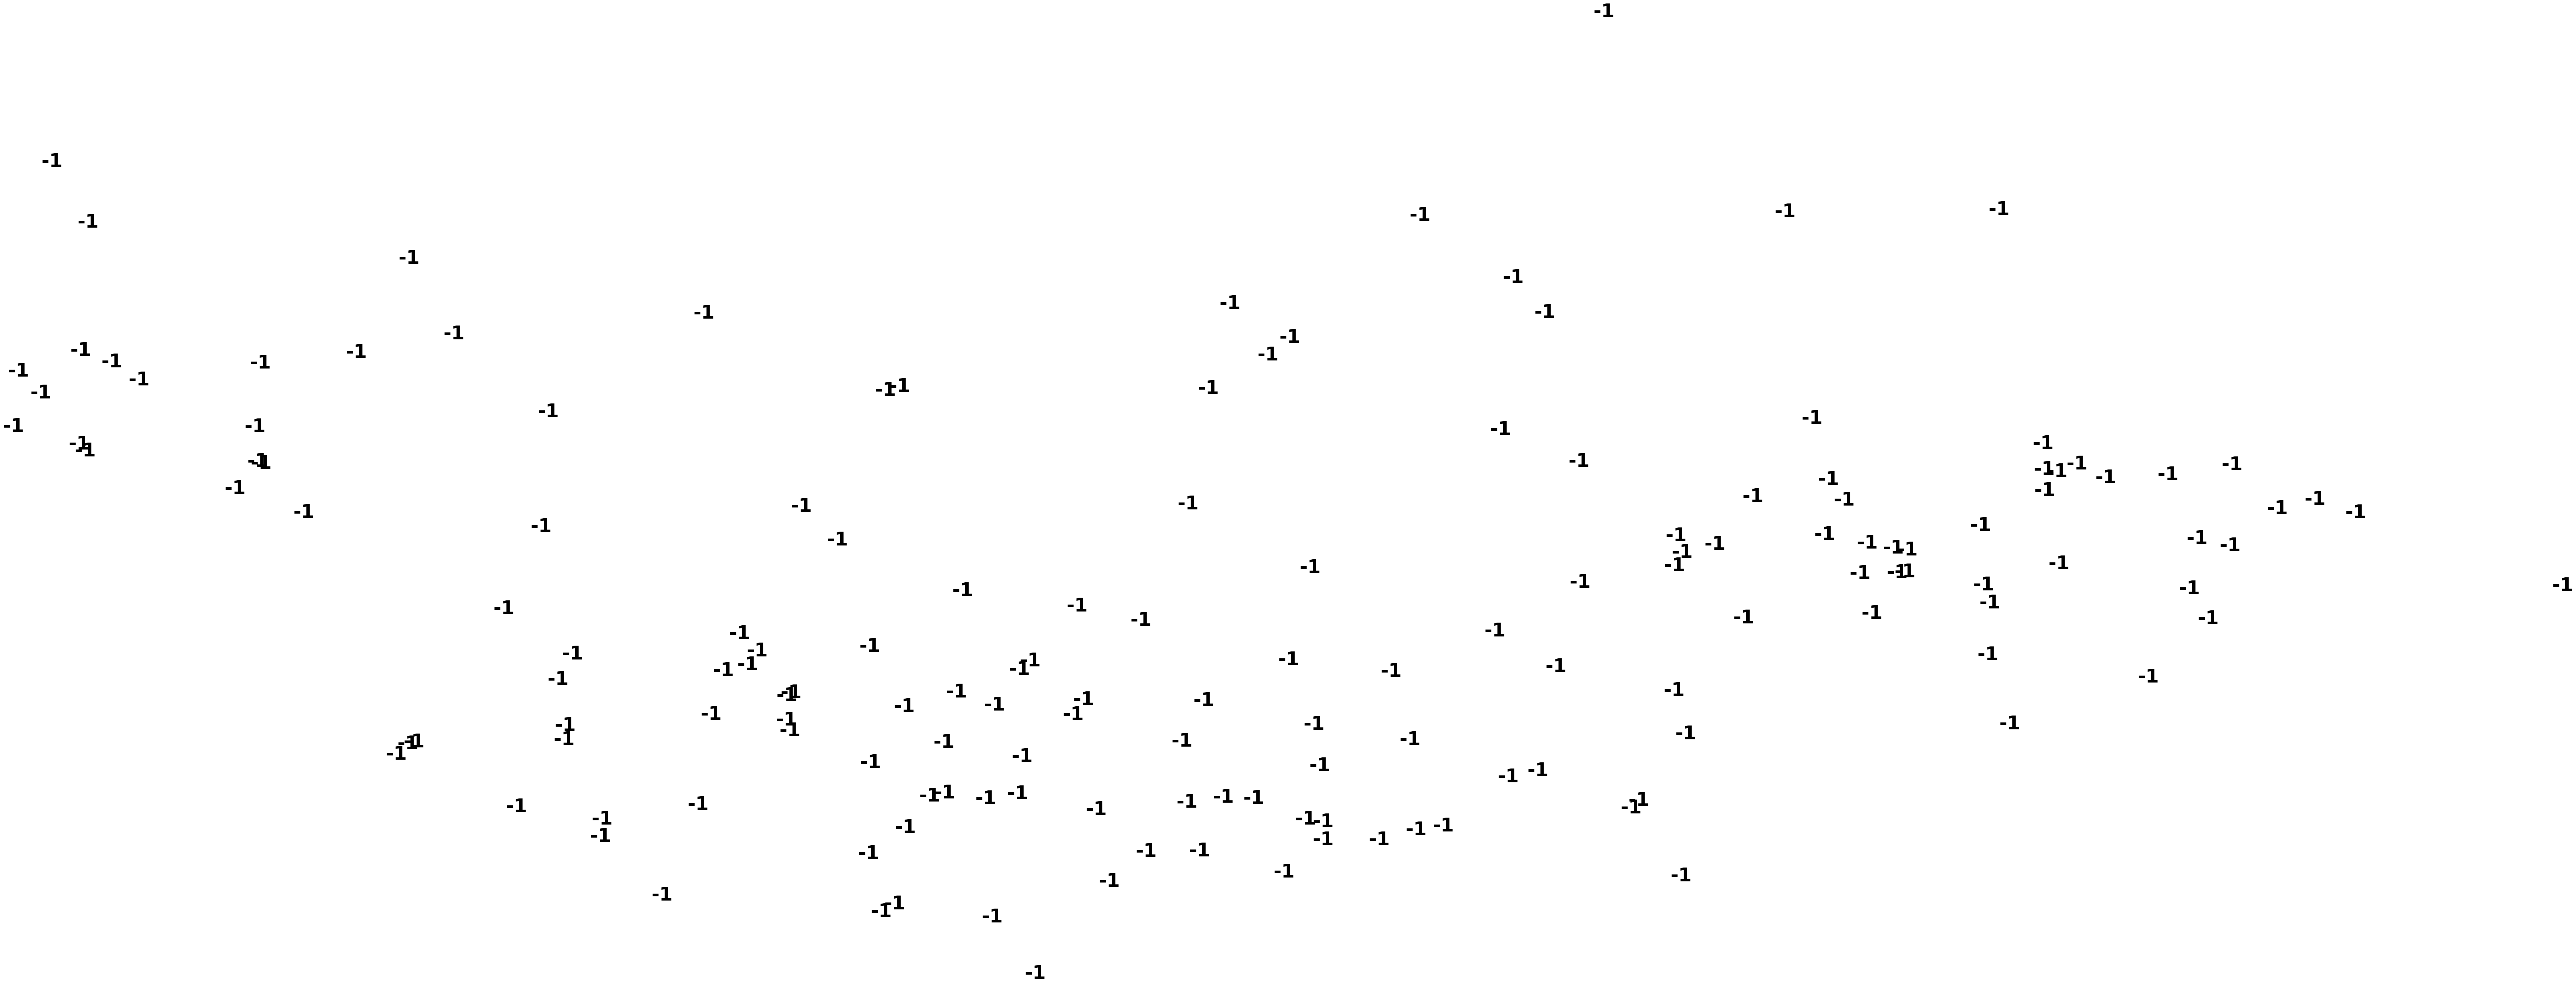

In [54]:
pca_dbscan = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca_dbscan.shape[0]):
    plt.text(pca_dbscan[i, 0], pca_dbscan[i, 1], str(clusters_dbscan[i]),
             
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [56]:
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X_std, clusters_dbscan, metric='euclidean')))

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [57]:
from sklearn.cluster import AgglomerativeClustering

In [59]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                             n_clusters=5)

# Fit model
clusters_agg = agg_cluster.fit_predict(X_std)

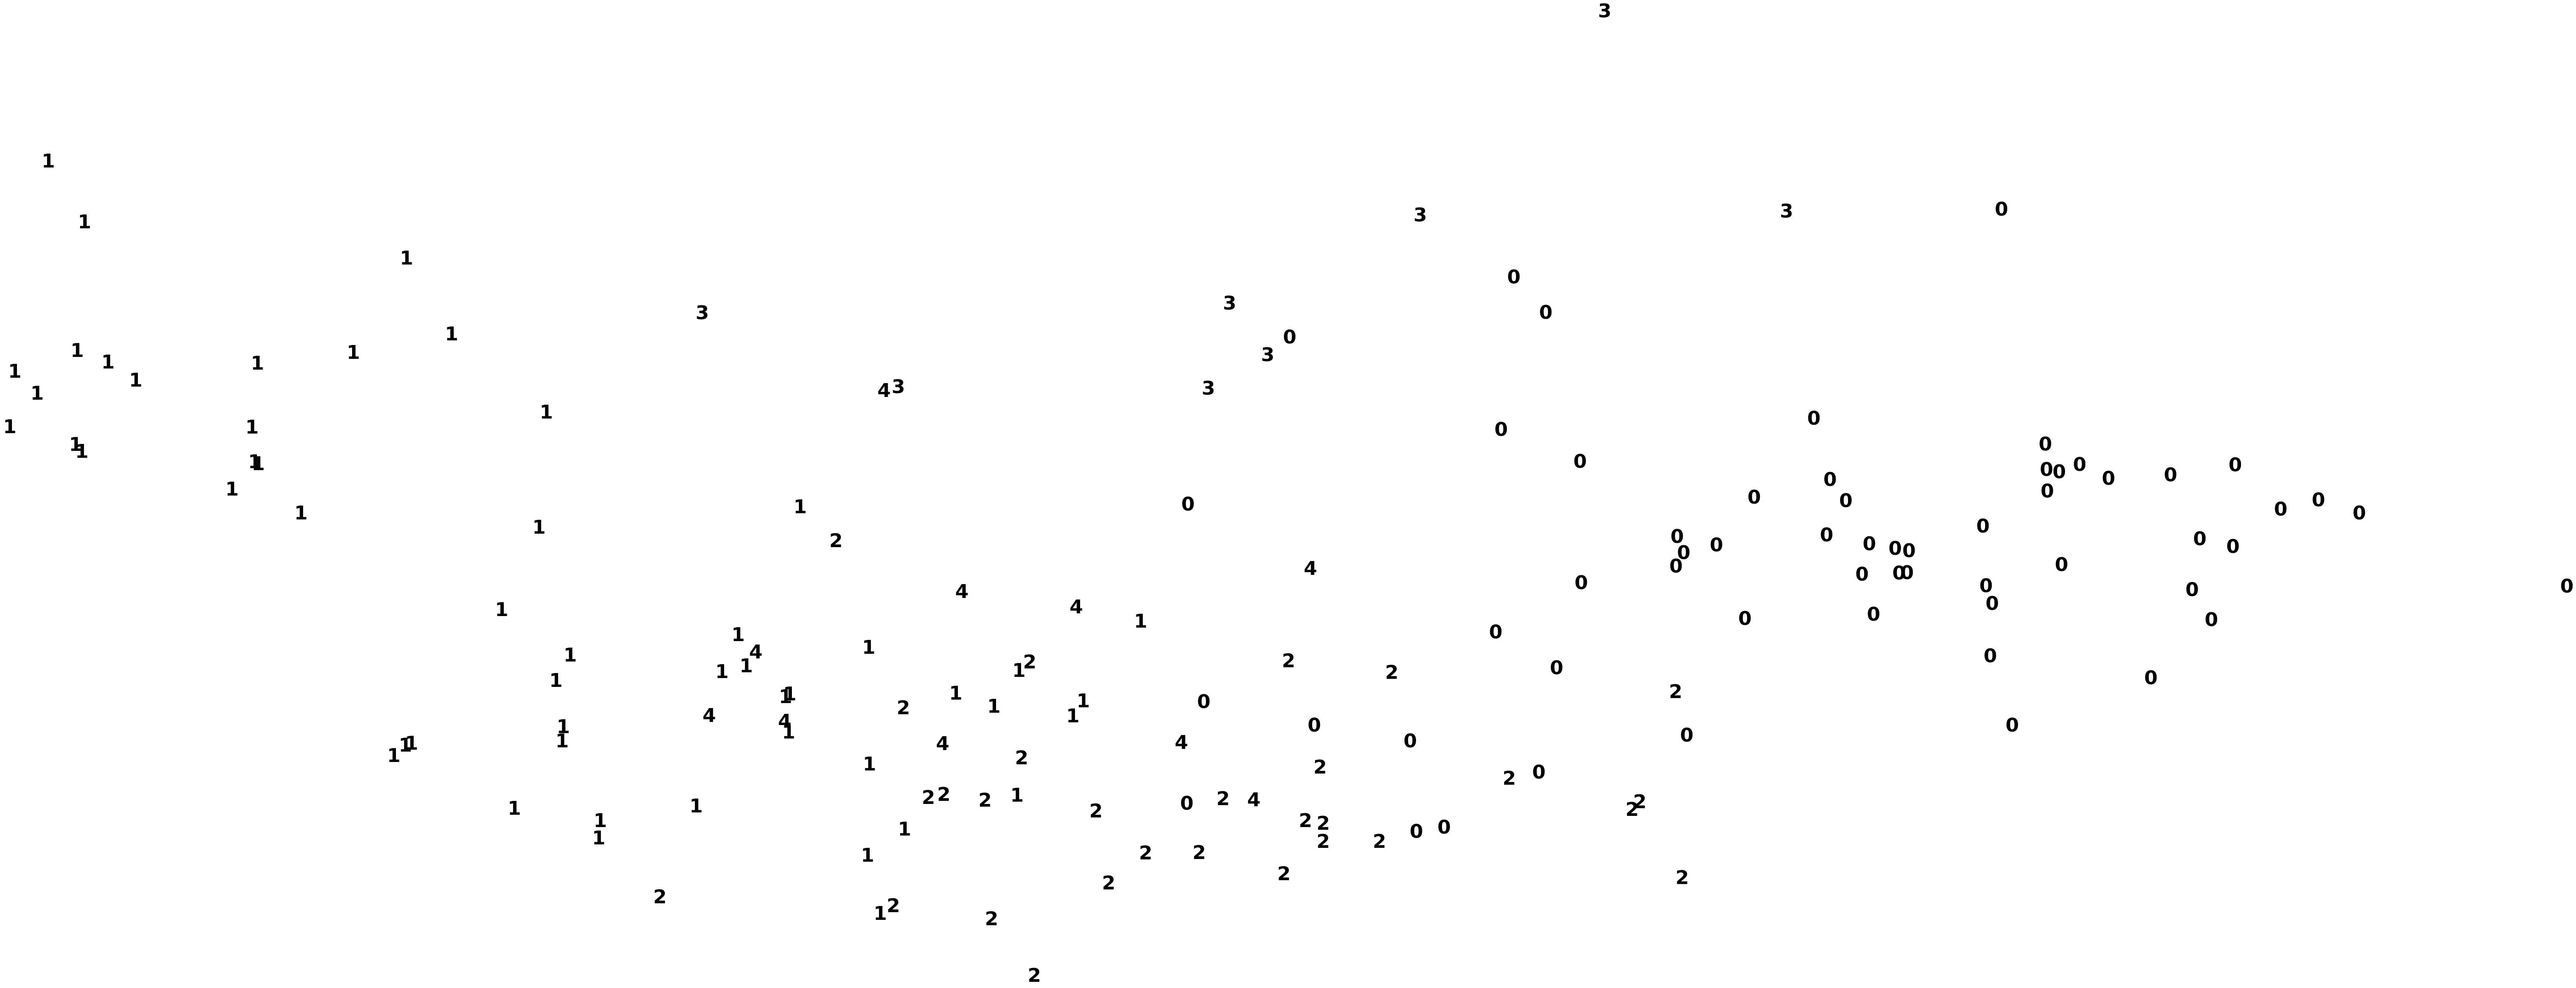

In [61]:
pca_hc = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca_hc.shape[0]):
    plt.text(pca_hc[i, 0], pca_hc[i, 1], str(clusters_agg[i]),
             
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [63]:
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X_std, clusters_agg, metric='euclidean')))

The silhouette score of the DBSCAN solution: 0.01654146225095649
